In [8]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt



# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from Funcs import *
from Model import *
model = career_choice()
model.setup()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1
We consider a graduate $i$ making a choice between entering $J$ different career tracks.  
We start by calculating the expected utility and the average realised utility for each career choice:

In [9]:
average_realised_utility, expected_utility, epsilon_diff = sim_utility(model.par)
print(average_realised_utility[-1, :])
print(expected_utility[-1, :])

[-0.00273463 -1.78471365  2.54223158]
[0.99989973 1.99962153 2.99995422]


Below we plot the difference between the "real" $\epsilon$ and the mean of $\epsilon$, which must be the cause of the difference between average realised utility and the expected utility:

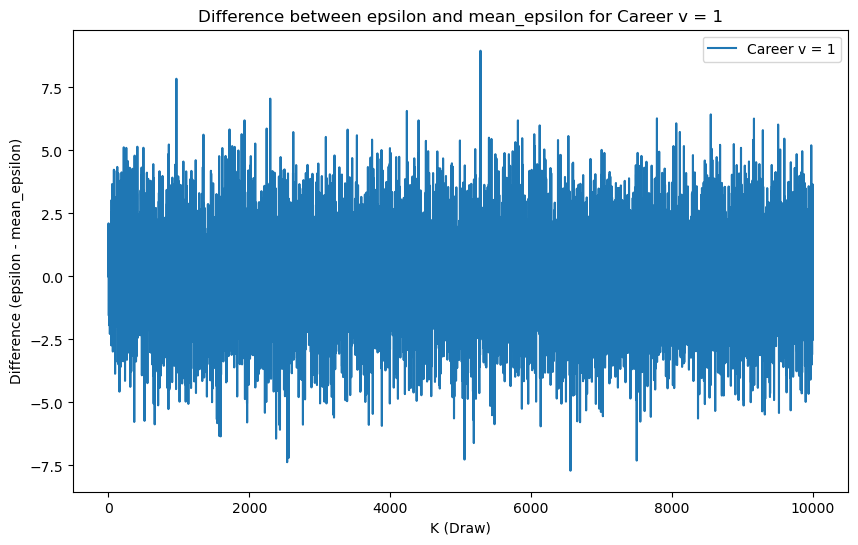

In [10]:
# Plotting (The plot is made using CoPilot)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(model.par.K), epsilon_diff[:, 0], label='Career v = 1')

plt.xlabel('K (Draw)')
plt.ylabel('Difference (epsilon - mean_epsilon)')
plt.title('Difference between epsilon and mean_epsilon for Career v = 1')
plt.legend()
plt.show()

We see that the difference is centered around 0, which makes sense, since $\epsilon$ is "white-noise" with mean 0

# Question 2
The indivuals now consider their friends when making career choices.

In [11]:
def friend_utility(par):
    '''Simulate utility for friends'''
    np.random.seed(42)

    # Arrays to store utilities
    friend_expected_utility = np.zeros((par.K, par.N, par.J))
    own_realised_utility = np.zeros((par.K, par.N, par.J))
    own_expected_utility = np.zeros((par.K, par.N, par.J))
    chosen_career = np.zeros((par.K, par.N), dtype=int)
    
    for i in range(par.N):  # Loop over friends
        
        # We are told they have i friends. We add 1 to accound for Python indexing
        Fi = i + 1

        for k in range(par.K):          # Loop over simulations        
    
            for j in range(par.J):      # Loop over careers
                
                # Friend
                friend_epsilon = np.random.normal(0, par.sigma)
                friend_expected_utility[k,i,j] = 1/Fi * np.sum(par.v[j] + friend_epsilon)

                # Self
                own_epsilon = np.random.normal(0, par.sigma)
                own_realised_utility[k,i,j] = par.v[j] + own_epsilon
                own_expected_utility[k,i,j] = friend_expected_utility[k,i,j]
            
            # Find the career with the highest expected utility
            chosen_career[k,i] = np.argmax(own_expected_utility[k,i, :])

    return friend_expected_utility , own_realised_utility, own_expected_utility, chosen_career

friend_expected_utility , own_realised_utility, own_expected_utility, chosen_career = friend_utility(model.par)
print(chosen_career)

[[1 1 1 ... 2 1 2]
 [0 1 1 ... 2 2 1]
 [0 0 2 ... 2 2 2]
 ...
 [1 2 2 ... 0 2 1]
 [1 1 2 ... 2 1 2]
 [0 1 1 ... 0 2 2]]


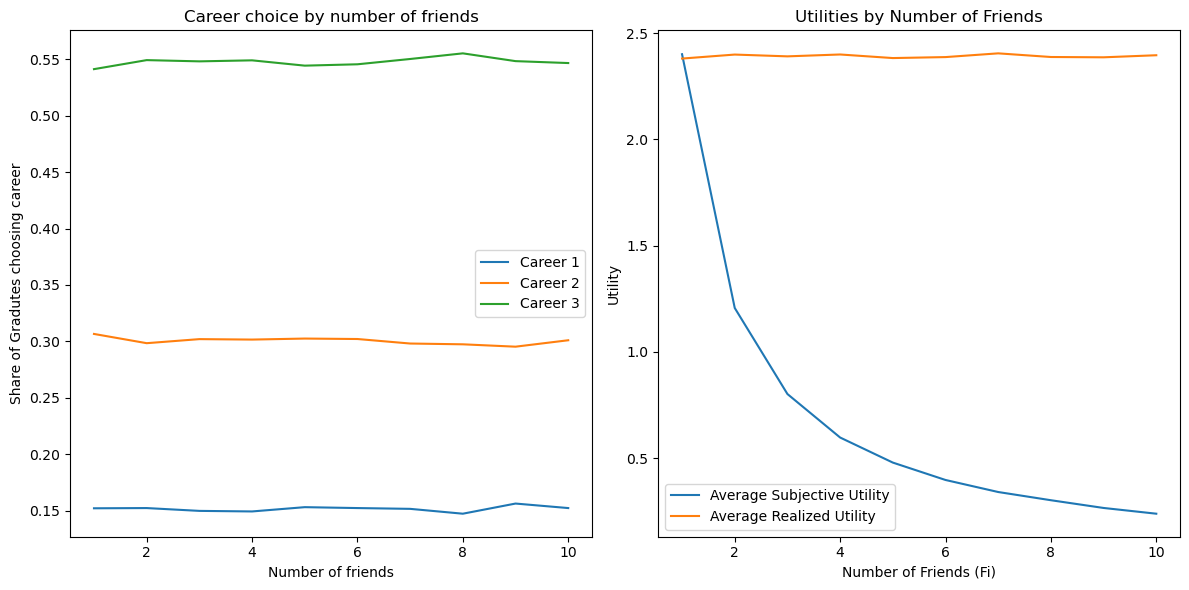

In [12]:


def analyze(par, chosen_career, own_expected_utility, own_realised_utility):
    career_counts = np.zeros((par.N, par.J))
    average_expected_utility = np.zeros(par.N)
    average_realised_utility = np.zeros(par.N)

    for i in range(par.N):
        for j in range(par.J):
            career_counts[i,j] = np.mean(chosen_career[:,i] == j)
        
        expected_utility_temp = own_expected_utility[:,i, chosen_career[:,i]]
        realised_utility_temp = own_realised_utility[:,i, chosen_career[:,i]]

        average_expected_utility[i] = np.mean(expected_utility_temp)
        average_realised_utility[i] = np.mean(realised_utility_temp)
    
    return career_counts, average_expected_utility, average_realised_utility



def plotting(career_counts, average_expected_utility, average_realised_utility):
    x = np.arange(1, model.par.N+1)

    plt.figure(figsize=(12, 6))

    # plot career choices
    plt.subplot(1,2,1)
    for j in range(model.par.J):
        plt.plot(x, career_counts[:,j], label=f'Career {j+1}')
    plt.xlabel('Number of friends')
    plt.ylabel('Share of Gradutes choosing career')
    plt.title('Career choice by number of friends')
    plt.legend()

    # Plot utilities
    plt.subplot(1, 2, 2)
    plt.plot(x, average_expected_utility, label='Average Subjective Utility')
    plt.plot(x, average_realised_utility, label='Average Realized Utility')
    plt.xlabel('Number of Friends (Fi)')
    plt.ylabel('Utility')
    plt.title('Utilities by Number of Friends')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Calculate the aksed for sizes
career_counts, avg_subjective_utility, avg_realized_utility = analyze(model.par, chosen_career, own_expected_utility, own_realised_utility)

# Plot results
plotting(career_counts, avg_subjective_utility, avg_realized_utility)

